In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/d7/tvpstc5n1ll5xtg7dqf63jqm0000gn/T/ipykernel_49108/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("out/data.csv")
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,GET /,2025-05-08 10:48:04+02:00,243971334,123593959,119537375,2674750,1451209,200 OK,200,NaN
1,GET /,2025-05-08 10:48:04+02:00,256501709,130761917,126730792,2680500,188042,200 OK,200,NaN
2,GET /anything,2025-05-08 10:48:04+02:00,232518542,115871875,114231875,1535625,124333,200 OK,200,NaN
3,PUT /anything,2025-05-08 10:48:04+02:00,245792959,123022958,121187792,1640375,383083,200 OK,200,NaN
4,GET /,2025-05-08 10:48:05+02:00,247554000,120774417,118482625,2106958,158167,200 OK,200,NaN


In [3]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000

In [4]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                         ConnDuration_ms  \
                               count        mean         std           count   
ID            StatusCode                                                       
GET /         200                 79  516.559325  533.231935              79   
              502                  1  462.199750         NaN               1   
GET /anything 200                 80  516.849431  511.600706              80   
PUT /anything 200                 79  495.948517  408.198951              79   

                                                 DialDuration_ms              \
                                mean         std           count        mean   
ID            StatusCode                                                       
GET /         200         132.934847  113.062904              79  131.103469   
              502         120.200709         NaN               1  118.148125   
GET /anything 200         119.602585    3.380033              80  117.658612   
PUT /anything 200         120.070870    3.166006              79  118.210851   

                                     DNSDuration_ms                      \
                                 std          count      mean       std   
ID            StatusCode                                                  
GET /         200         113.031918             79  1.644768  0.433906   
              502                NaN              1  1.914083       NaN   
GET /anything 200           3.327369             80  1.761098  0.574520   
PUT /anything 200           3.191330             79  1.700669  0.537432   

                         RequestDuration_ms                      
                                      count      mean       std  
ID            StatusCode                                         
GET /         200                        79  0.137203  0.155702  
              502                         1  0.153916       NaN  
GET /anything 200                        80  0.143103  0.076618  
PUT /anything 200                        79  0.140850  0.059125

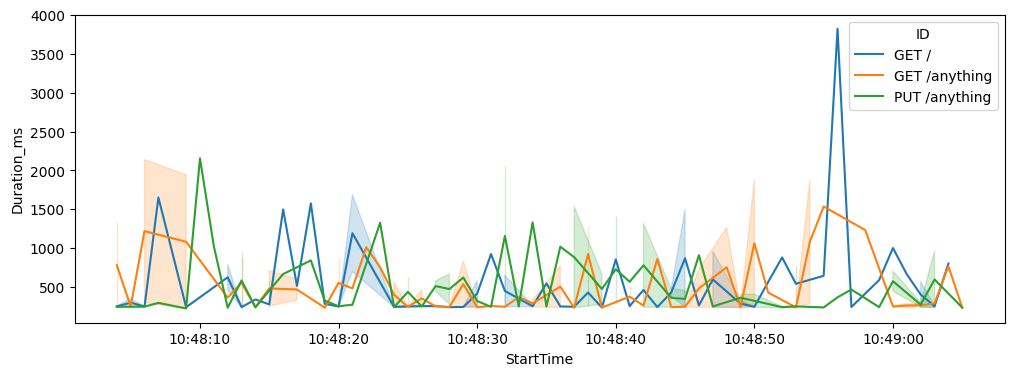

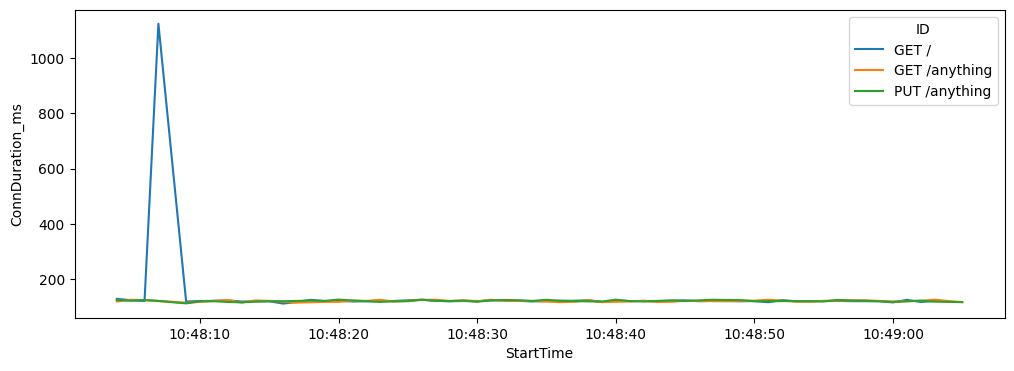

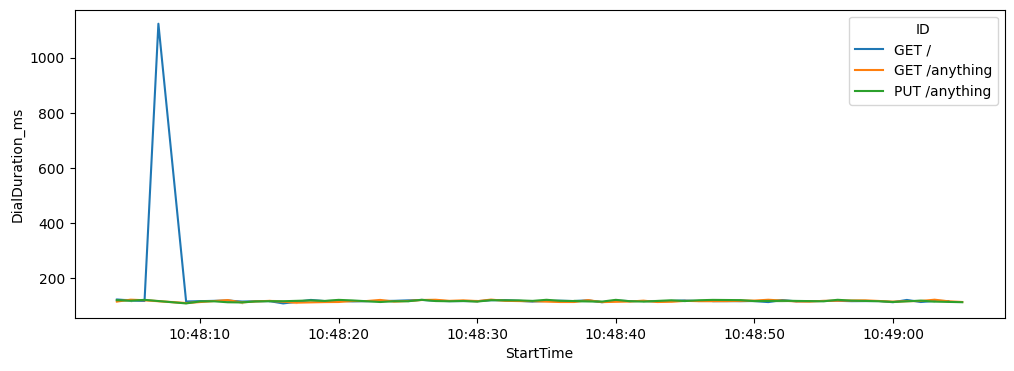

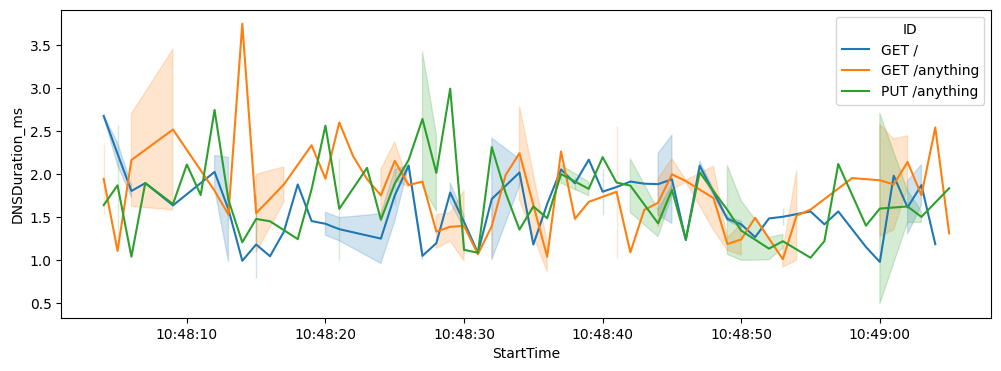

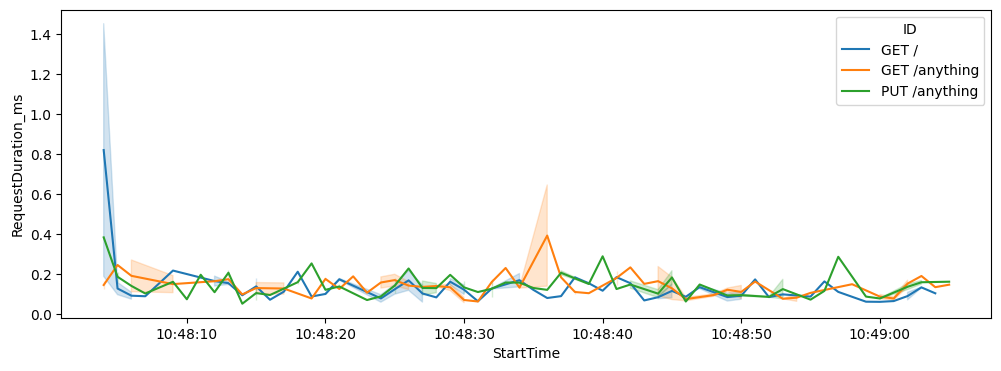

In [5]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

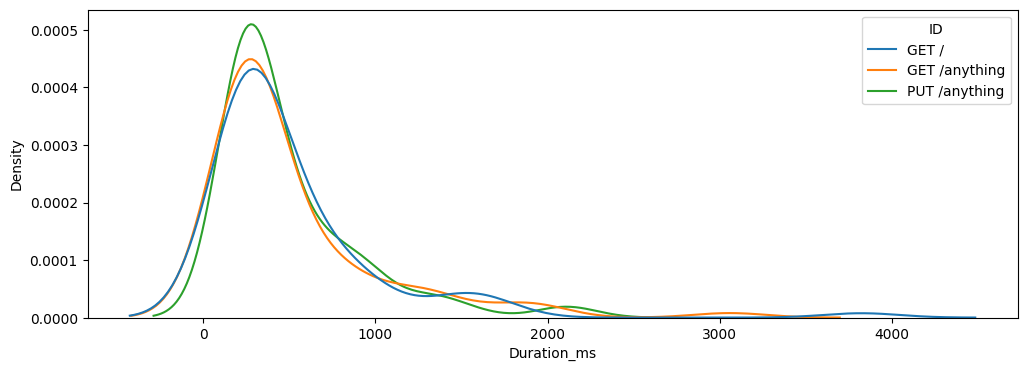

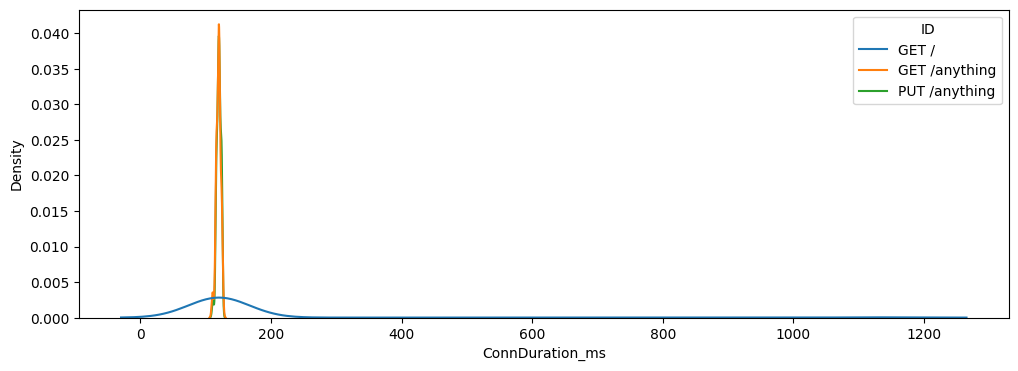

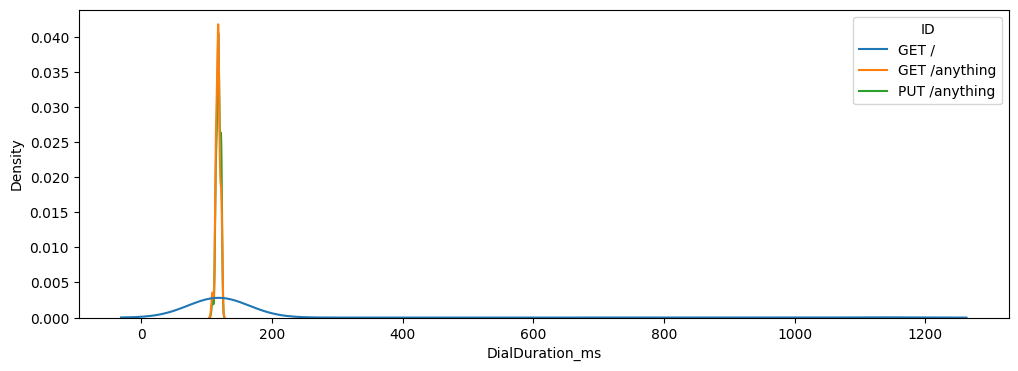

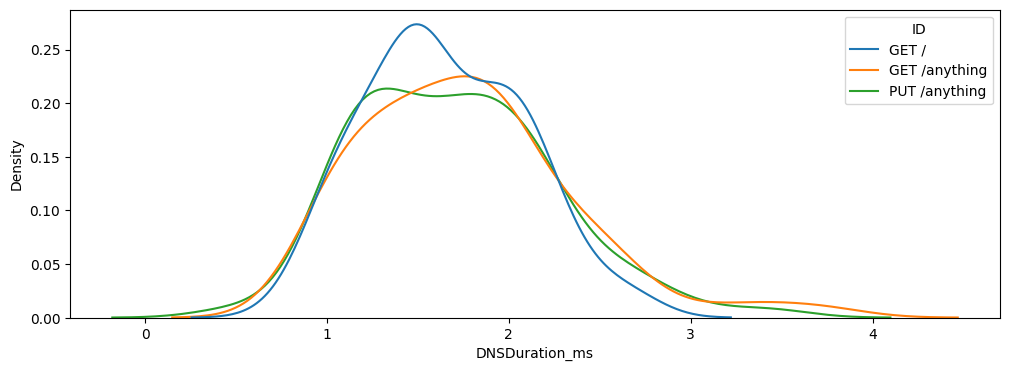

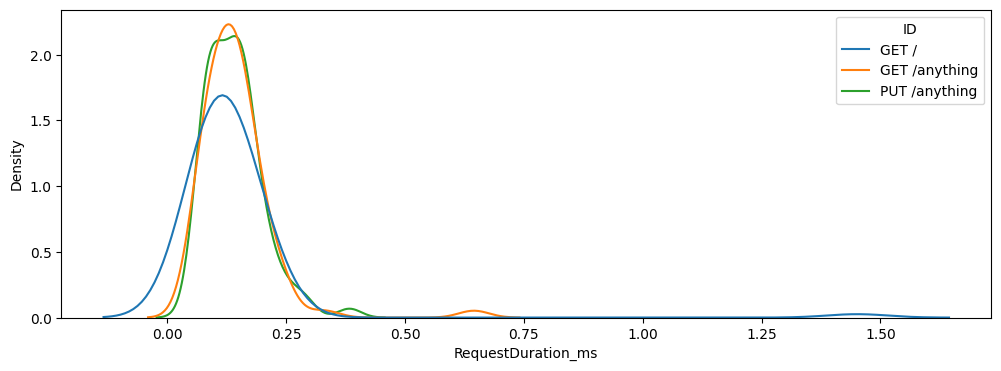

In [6]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID")
        plt.show()